# Analyse GANN training

## Init

Load libraries

In [16]:
library(dplyr)
library(Seurat)
library(patchwork)

In [24]:
#sessionInfo()

Set paths

In [7]:
paths.train_nonorm_path <- "../data/tpm_combined_train_nonorm.csv"
path.gene_names <- "../data/tpm_combined_rows.csv"

## Load names 

In [11]:
genes <- scan(path.gene_names, what = "character")

## Load and visualise training data

Load unnormalised training data

In [49]:
train_nonorm_raw <- read.table(file=paths.train_nonorm_path, sep=",", row.names = 1, header=TRUE)
head(train_nonorm_raw)

,P1.3.A10,P1.3.A11,P1.3.A12,P1.3.A2,P1.3.A4,P1.3.A5,P1.3.A6,P1.3.A7,P1.3.A8,P1.3.B3,⋯,GHA501A85,GHA501A86,GHA501A88,GHA501A89,GHA501A90,GHA501A94,GHA501A95,GHA501A98,GHA501A99,GHA501A9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Rfc3,0.000000,0.000000,0.000000,0.000000,0.000000,3.051372,5.617063,0.000000,0.0000000,3.526069,⋯,7.7553921,1.241720,6.2614044,6.480059,4.7291586,6.4899840,1.092268,3.6619208,3.921598,0.000000
Cd47,6.033863,5.564378,4.365972,6.768714,5.736875,4.075533,6.556276,4.442280,4.7147950,5.123914,⋯,8.8863576,9.001691,8.5115705,7.932110,7.6587774,6.0236338,10.458879,7.5448340,8.581246,9.770376
Elmo2,5.838195,0.000000,5.755422,7.441948,5.530757,6.876149,6.384568,7.330200,6.6519127,5.215679,⋯,6.7044797,5.044924,5.3982323,2.299830,0.7719891,1.2724215,2.308829,2.1354247,6.343773,3.824600
Crip2,3.327687,7.560868,0.000000,6.962318,5.048759,5.891905,0.000000,0.000000,4.4289463,4.556429,⋯,0.0000000,0.000000,0.0000000,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.000000,0.000000
Pprc1,5.766860,0.000000,5.279471,4.466627,4.186659,2.851999,2.272023,5.751410,0.8318772,5.511595,⋯,3.8067596,0.000000,1.0618995,4.385497,1.6626486,0.0000000,0.000000,0.7437538,2.725903,1.069900
Ccdc174,1.372952,0.000000,0.000000,5.659925,2.981853,0.000000,0.000000,1.879706,0.0000000,1.589763,⋯,0.3346734,4.237288,0.5734587,5.510105,2.3899220,0.9136959,5.156094,2.6889399,1.939234,6.256904


Create Seurat object

In [30]:
train_nonorm <- CreateSeuratObject(counts = train_nonorm_raw, project="wgan")
train_nonorm

An object of class Seurat 
6807 features across 1798 samples within 1 assay 
Active assay: RNA (6807 features, 0 variable features)

In [22]:
slotNames(train_nonorm)

[1] "assays"       "meta.data"    "active.assay" "active.ident" "graphs"      
 [6] "neighbors"    "reductions"   "project.name" "misc"         "version"     
[11] "commands"     "tools"

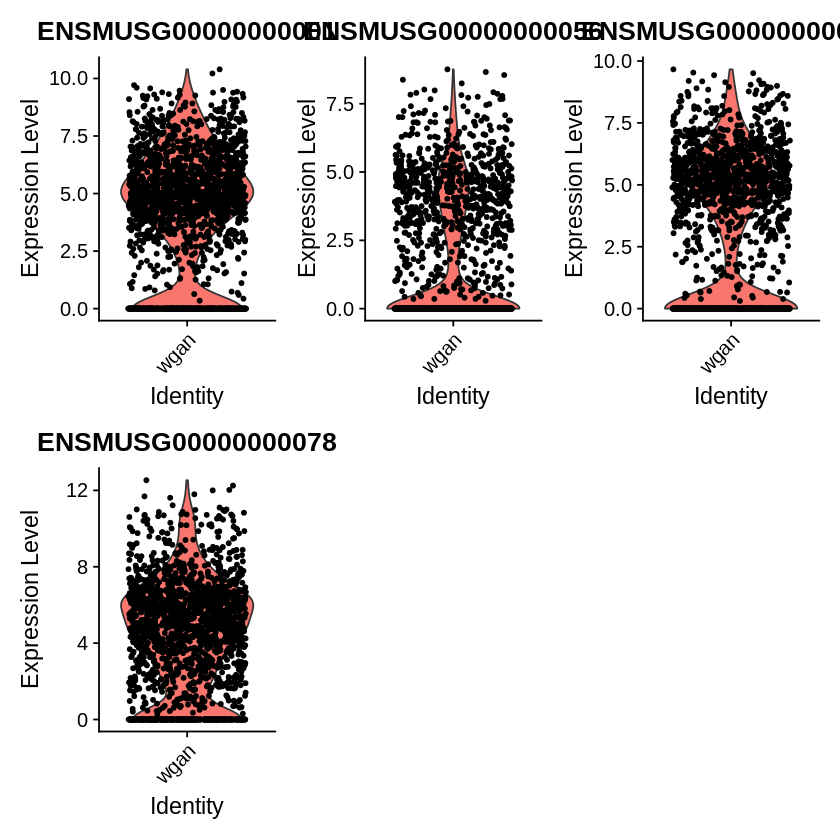

In [29]:
# Look at some canonical marker genes and metrics
VlnPlot(train_nonorm,c("ENSMUSG00000000001","ENSMUSG00000000056","ENSMUSG00000000058","ENSMUSG00000000078"))

In [31]:
train_nonorm <- FindVariableFeatures(train_nonorm, selection.method = "vst", nfeatures = 2000)

In [34]:
all.genes <- rownames(train_nonorm)
train_nonorm <- ScaleData(object = train_nonorm, features = all.genes)

Centering and scaling data matrix



In [36]:
train_nonorm <- RunPCA(object = train_nonorm, features = VariableFeatures(object = train_nonorm))

PC_ 1 
Positive:  ENSMUSG00000046056, ENSMUSG00000060962, ENSMUSG00000043681, ENSMUSG00000033765, ENSMUSG00000069441, ENSMUSG00000053522, ENSMUSG00000074199, ENSMUSG00000026989, ENSMUSG00000092586, ENSMUSG00000019851 
	   ENSMUSG00000019761, ENSMUSG00000055561, ENSMUSG00000034634, ENSMUSG00000004951, ENSMUSG00000031451, ENSMUSG00000078144, ENSMUSG00000003032, ENSMUSG00000054146, ENSMUSG00000071076, ENSMUSG00000034607 
	   ENSMUSG00000021950, ENSMUSG00000024846, ENSMUSG00000018907, ENSMUSG00000071858, ENSMUSG00000036960, ENSMUSG00000061397, ENSMUSG00000063130, ENSMUSG00000002985, ENSMUSG00000030713, ENSMUSG00000013766 
Negative:  ENSMUSG00000007415, ENSMUSG00000055531, ENSMUSG00000020949, ENSMUSG00000022816, ENSMUSG00000020170, ENSMUSG00000056515, ENSMUSG00000062981, ENSMUSG00000020766, ENSMUSG00000020899, ENSMUSG00000048109 
	   ENSMUSG00000034024, ENSMUSG00000096255, ENSMUSG00000040351, ENSMUSG00000025203, ENSMUSG00000001473, ENSMUSG00000022451, ENSMUSG00000029836, ENSMUSG00000020171,

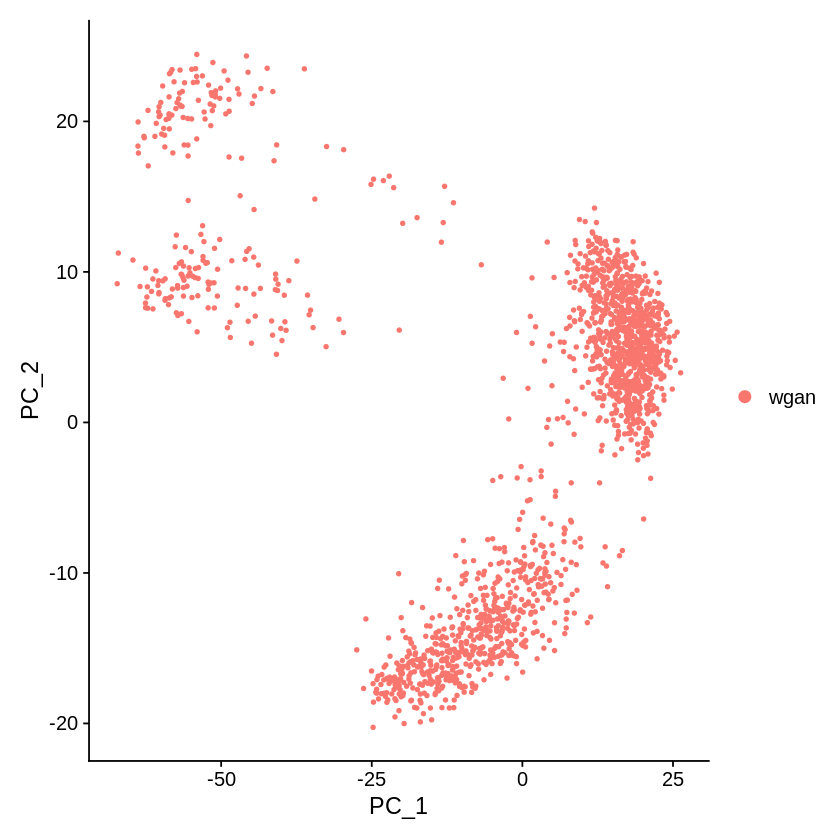

In [37]:
DimPlot(train_nonorm, reduction = "pca")

In [47]:
train_nonorm <- RunTSNE(object = train_nonorm, dims = 3:10)

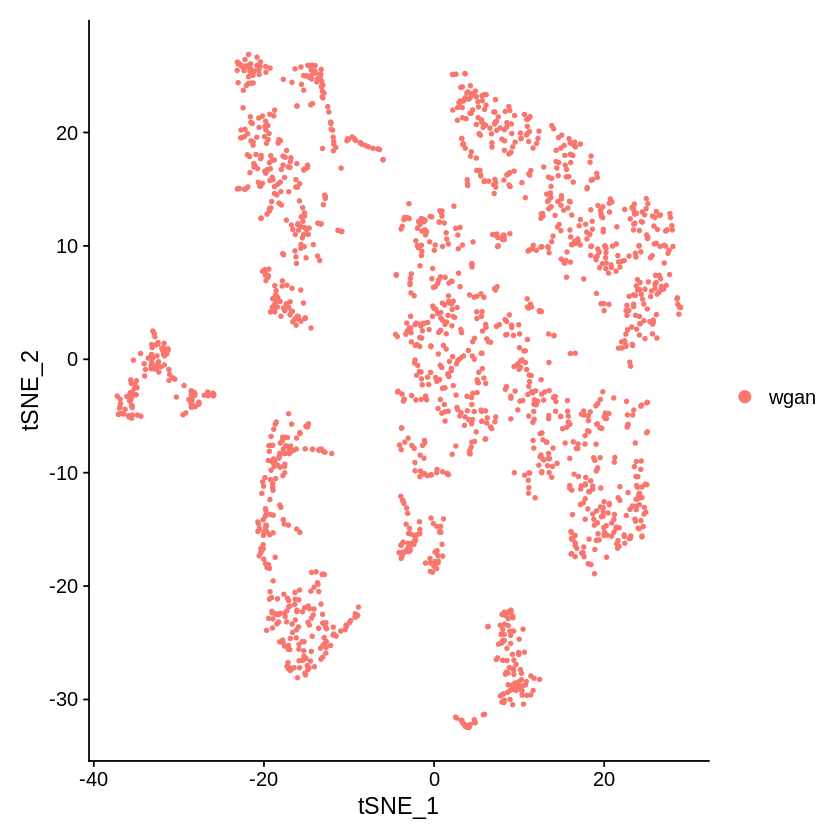

In [48]:
DimPlot(train_nonorm, reduction = "tsne")

In [46]:
# If you haven't installed UMAP, you can do so via reticulate::py_install(packages =
# 'umap-learn')
train_nonorm <- RunUMAP(train_nonorm, dims = 3:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:15:39 UMAP embedding parameters a = 0.9922 b = 1.112

11:15:39 Read 1798 rows and found 8 numeric columns

11:15:39 Using Annoy for neighbor search, n_neighbors = 30

11:15:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

11:15:40 Writing NN index file to temp file /tmp/Rtmpl2Avtv/file6872ffcaa8

11:15:40 Searching Annoy index using 1 thread, search_k = 3000

11:15:41 Annoy recall = 100%

11:15:41 Commencing smooth kNN distance calibration using 1 thread

11:15:41 Initializing from 

In [ ]:
reticulate::py_install(packages = 'umap-learn')